In [ ]:
#Problem Statement

"""
We have huge number of comments from Youtube for latest from a worldwide production house , you as an AI service provider are suppose to analyse all that
comments on that trailer,get sentiment and score and give a consolidated report on that trailer about hoe it might perform in box office
"""

'\nWe have huge number of comments from Youtube for latest from a worldwide production house , you as an AI service provider are suppose to analyse all that\ncomments on that trailer,get sentiment and score and give a consolidated report on that trailer about hoe it might perform in box office\n'

In [ ]:
import pandas as pd

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
df = pd.read_excel("/content/SnowWhite Comments.xlsx")

In [ ]:
comments = []
comments = df['Comments'].to_list()

In [ ]:
print(comments)

['Snow Latina doesn’t eat a poison apple, instead she drinks tequila (jk)', 'if the ending involves this variation of snow white eating the poison apple and the prince running away and not saving her I&#39;ll go see it.', 'Nope🥱', 'Just 1 more day until we get to see the box office numbers not roll in! Yay!', 'Get woke go broke', 'I hope her carrier ends with this movie', 'Why People hate this movie? Why? Give some explanation please', 'I&#39;ve seen interviews where she talks like an A-lister despite being a nobody 😂 Is this her? Yikes!', 'I thought it was Snow White ,not snow Latina', 'Disney fukt up snow white', 'A movie about beauty in both ways. Disney taught me true beauty lies within. Rachel IS a beautiful woman, yes, but the only reason she doesn&#39;t look it in this movie is because her personality is not beautiful. Disservice to Snow White, the fairest of them all.', 'Pretty expensive for a movie about a woman living together with 7 single men.', 'I hope the &quot;evil&quot;

In [ ]:
for comment in comments:
  print(comment)
  print('-'*50)

Snow Latina doesn’t eat a poison apple, instead she drinks tequila (jk)
--------------------------------------------------
if the ending involves this variation of snow white eating the poison apple and the prince running away and not saving her I&#39;ll go see it.
--------------------------------------------------
Nope🥱
--------------------------------------------------
Just 1 more day until we get to see the box office numbers not roll in! Yay!
--------------------------------------------------
Get woke go broke
--------------------------------------------------
I hope her carrier ends with this movie
--------------------------------------------------
Why People hate this movie? Why? Give some explanation please
--------------------------------------------------
I&#39;ve seen interviews where she talks like an A-lister despite being a nobody 😂 Is this her? Yikes!
--------------------------------------------------
I thought it was Snow White ,not snow Latina
--------------------------

In [ ]:
import nltk

nltk.download('vader_lexicon')  #all words that exist in english will be downloaded here

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
#Example
comment_score = sia.polarity_scores('This is a good movie')
print(comment_score)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}


here you can think compound score as a final score, but sometimes this don't give a perfect output

In [ ]:
#Example
print(sia.polarity_scores('the first part was amazing and outstanding, but second part sucks'))

{'neg': 0.201, 'neu': 0.495, 'pos': 0.303, 'compound': 0.1655}


In [ ]:
# Therefore for classifying comments whether it is positive or not we will use an AI model from the huggging face
#to get the score of the sentiment we will go with nltk

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [ ]:
sentence = "Today the day is so sunny"
tokenize_comment = word_tokenize(sentence)
print(tokenize_comment)
processed_comment = [word for word in tokenize_comment if word.lower() not in stop_words]
print(processed_comment)

['Today', 'the', 'day', 'is', 'so', 'sunny']
['Today', 'day', 'sunny']


In [ ]:
def remove_stopwords(raw):
  tokenize_comment = word_tokenize(raw)
  processed_comment = [word for word in tokenize_comment if word.lower() not in stop_words]
  return ' '.join(processed_comment)

In [ ]:
print(remove_stopwords("Today the day is so sunny"))

Today day sunny


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("sentiment-analysis",model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
def getSentimentDetails(raw):
  processed_comment = remove_stopwords(raw)
  words = processed_comment.split()
  positiveWords = ""
  negativeWords = ""
  commentScore = "" #Either positive or Negative
  sentScoreTemp = sia.polarity_scores(processed_comment)
  absScore = abs(sentScoreTemp['compound'])
  sentiment_label = classifier(processed_comment)
  commentSenti = sentiment_label[0]['label']
  if absScore == 0:
    commentSenti = "NEUTRAL"
    sentScore = absScore
  if commentSenti == "POSITIVE":
    sentScore = absScore
    for word in words:
      wordSenti = sia.polarity_scores(word)
      if wordSenti['compound'] > 0:
        positiveWords += word + " "
  elif commentSenti == "NEGATIVE":
    sentScore = -absScore
    for word in words:
      wordSenti = sia.polarity_scores(word)
      if wordSenti['compound'] < 0:
        negativeWords += word + " "
  return positiveWords,negativeWords,sentScore,commentSenti

In [ ]:
print(classifier("i am very happy today"))

[{'label': 'POSITIVE', 'score': 0.9998797178268433}]


In [ ]:
positiveWords = ""
negativeWords = ""
neuCount = 0

posValList = []
negValList = []
avgPosScore = 0
avgNegScore = 0

for comment in comments:
  pw,nw,ss,cs = getSentimentDetails(comment)
  positiveWords += pw + " "
  negativeWords += nw + " "

  if cs == "NEGATIVE":
    negValList.append(ss)
  elif cs == "POSITIVE":
    posValList.append(ss)
  else:
    neuCount += 1

try:
  avgPosScore = sum(posValList) / len(posValList)
  avgNegScore = sum(negValList) / len(negValList)
except ZeroDivisionError:
  if len(posValList) == 0 or len(negValList) == 0:
    avgPosScore = 0
    avgNegScore = 0

final_score = (avgPosScore + avgNegScore) / (len(posValList) + len(negValList))

In [ ]:
print(final_score)

0.0024668760064412236


In [ ]:
positiveWords

'   Yay   hope      beauty true beauty beautiful yes beautiful  Pretty  hope                  credit brave    greatest     true   prettier         likes     great  Admit          lover hope       hope win     supportive masterpiece   romantic Marvel          admit admire bravery     save       great want original original  Well giving  love    thank   Jokes great   '

In [ ]:
negativeWords

'poison     broke   hate        mess  insult    stop stop  disappointed  dislike  dislikes. bomb  destroy  cruelty  bad   bad       seriously    madness WORST DOOM  DROP DISLIKE LEAVE      stop propaganda      mad    worst     Bad Bad    poor    abused  empty   poor  Nah scream      cut     lost     lowest destroy  dumpster fire    sucks  horrendous awful        flop           Dislikes   evil  '

In [ ]:
avgNegScore

-0.40833555555555556

In [ ]:
avgPosScore

0.57855

In [ ]:
!pip install wordcloud

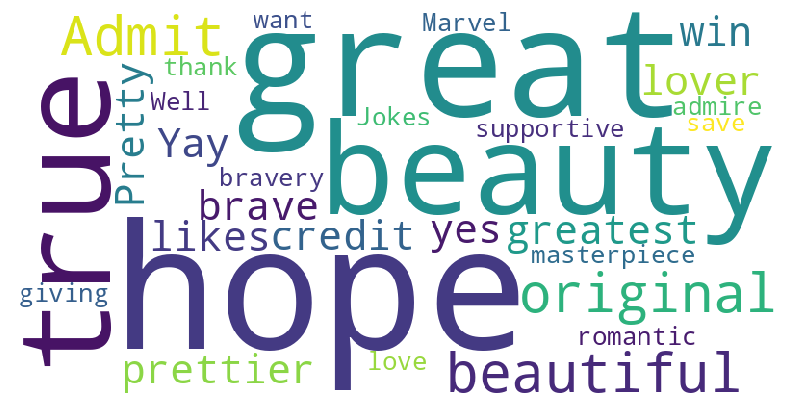

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloudPos = WordCloud(width = 800,height = 400,background_color = 'White').generate(positiveWords)

plt.figure(figsize = (10,5))
plt.imshow(wordCloudPos,interpolation='nearest')

plt.axis('off')
plt.show()

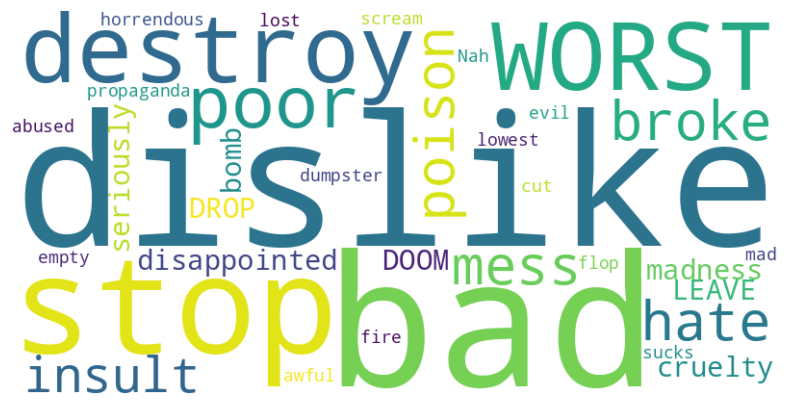

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloudNeg = WordCloud(width = 800,height = 400,background_color = 'White').generate(negativeWords)

plt.figure(figsize = (10,5))
plt.imshow(wordCloudNeg,interpolation='bilinear')

plt.axis('off')
plt.show()